In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The city of New York has collected data on every automobile collision in city limits since mid-2012. Collisions are broken down by borough, zip code, latitude/longitude, and street name. Each entry describes injuries/deaths, collision causes, and vehicle types involved. The data can be downloaded from: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95 Download the "NYPD Motor Vehicle Collisions" dataset in .csv format. The download link can be found under the "Export" tab. Information on the variables can be found on this page, as well, along with a preview of the rows of the dataset. For all questions, do not use data occurring after December 31, 2018.

In [40]:
#read the data
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')
df.dtypes

/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [16]:
df.head(-5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/29/2019,0:00,BRONX,10453,40.848440,-73.910680,"(40.84844, -73.91068)",TOWNSEND AVENUE,EAST 176 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4122943,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,04/29/2019,0:00,QUEENS,11365,40.736595,-73.800130,"(40.736595, -73.80013)",169 STREET,65 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4122788,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2,04/29/2019,0:00,QUEENS,11374,40.730503,-73.869800,"(40.730503, -73.8698)",ELIOT AVENUE,WETHEROLE STREET,NaN,...,NaN,NaN,NaN,NaN,4122525,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/29/2019,0:00,QUEENS,11413,40.670630,-73.756430,"(40.67063, -73.75643)",141 ROAD,SPRINGFIELD BOULEVARD,NaN,...,Unsafe Speed,Unspecified,Unspecified,NaN,4122775,Pick-up Truck,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN
4,04/29/2019,0:00,NaN,NaN,40.669796,-73.870570,"(40.669796, -73.87057)",EUCLID AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4122913,Pick-up Truck,NaN,NaN,NaN,NaN
5,04/29/2019,0:00,BROOKLYN,11226,40.641270,-73.958305,"(40.64127, -73.958305)",NaN,NaN,520 EAST 21 STREET,...,Unspecified,NaN,NaN,NaN,4122734,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
6,04/29/2019,0:12,MANHATTAN,10030,40.818306,-73.939040,"(40.818306, -73.93904)",NaN,NaN,127 WEST 141 STREET,...,Unspecified,NaN,NaN,NaN,4122116,Station Wagon/Sport Utility Vehicle,Tow Truck / Wrecker,NaN,NaN,NaN
7,04/29/2019,0:30,QUEENS,11419,40.693817,-73.822120,"(40.693817, -73.82212)",95 AVENUE,125 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4122488,Sedan,NaN,NaN,NaN,NaN
8,04/29/2019,0:35,QUEENS,11434,40.656160,-73.767360,"(40.65616, -73.76736)",ROCKAWAY BOULEVARD,BREWER BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4122262,Sedan,Pick-up Truck,NaN,NaN,NaN
9,04/29/2019,0:44,NaN,NaN,40.816510,-73.889870,"(40.81651, -73.88987)",BARRETTO STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4122475,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


What is the total number of persons injured in the dataset (up to December 31, 2018?)

In [23]:
totalinjured = 0
for item in df["NUMBER OF PERSONS INJURED"]:
    if item == item: # not equal NaN
        totalinjured = totalinjured + item
        #print(totalinjured)
print(totalinjured)

385743.0


What proportion of all collisions in 2016 occured in Brooklyn? Only consider entries with a non-null value for BOROUGH.

In [62]:
a = df['DATE']
total2016 = 0
for item in a:
    # print(item)
    if item[6:10] == "2016":
        total2016 = total2016 + 1
print(total2016)

229788


In [67]:
total2016 = 0
brooklyn2016 = 0
for index, row in df.iterrows():
    if row["DATE"][6:10] == "2016":
        total2016 = total2016 +1
    if row["BOROUGH"] == "BROOKLYN":
        brooklyn2016 = brooklyn2016 + 1
print(total2016)
print(brooklyn2016)

229788
47461


In [68]:
print(brooklyn2016/total2016)

0.20654255226556653


What proportion of collisions in 2016 resulted in injury or death of a cyclist?

In [70]:
bikeinjure = 0
bikekill = 0
for index, row in df.iterrows():
    if row["DATE"][6:10] == "2016":
        if row["NUMBER OF CYCLIST INJURED"] ==row["NUMBER OF CYCLIST INJURED"]  :
            bikeinjure = bikeinjure + row["NUMBER OF CYCLIST INJURED"]
        if row["NUMBER OF CYCLIST KILLED"] == row["NUMBER OF CYCLIST KILLED"]:
            bikekill = bikekill + row["NUMBER OF CYCLIST KILLED"]
print(bikeinjure)
print(bikekill)

5004
20


In [71]:
print((bikeinjure+bikekill)/total2016)

0.021863630824934286


For each borough, compute the number of accidents per capita involving alcohol in 2017. Report the highest rate among the 5 boroughs. Use populations as given by https://en.wikipedia.org/wiki/Demographics_of_New_York_City.

In [73]:
BRONX = 0
QUEENS = 0 
BROOKLYN = 0 
MANHATTAN = 0 
STATENISLAND = 0 
for index, row in df.iterrows():
    if row["DATE"][6:10] == "2017":
        if row['CONTRIBUTING FACTOR VEHICLE 1'] == "Alcohol Involvement" or row['CONTRIBUTING FACTOR VEHICLE 2'] == "Alcohol Involvement" or row['CONTRIBUTING FACTOR VEHICLE 3'] == "Alcohol Involvement" or row['CONTRIBUTING FACTOR VEHICLE 4'] =="Alcohol Involvement" or row['CONTRIBUTING FACTOR VEHICLE 5'] == "Alcohol Involvement":
            if row["BOROUGH"] =="BRONX" :
                BRONX = BRONX + 1
            if row["BOROUGH"] =="QUEENS" :
                QUEENS = QUEENS + 1
            if row["BOROUGH"] =="BROOKLYN" :
                BROOKLYN = BROOKLYN + 1
            if row["BOROUGH"] =="MANHATTAN" :
                MANHATTAN = MANHATTAN + 1
            if row["BOROUGH"] =="STATEN ISLAND" :
                STATENISLAND = STATENISLAND + 1 
            
print(STATENISLAND)        

100


In [76]:
print(BRONX/1471160)
print(BROOKLYN/2648771)
print(QUEENS/2358582)
print(MANHATTAN/1664727)
print(STATENISLAND/479458)

0.00018624758693819844
0.00022727521556223623
0.00021707958425867745
0.00015558106524373065
0.00020856884231778384


Consider the total number of collisions each year from 2013-2018. Is there an apparent trend? Fit a linear regression for the number of collisions per year and report its slope.

In [77]:
total2013 = 0
total2014 = 0 
total2015 = 0 
total2016 = 0 
total2017 = 0 
total2018 = 0 
for item in a:
    if item[6:10] == "2013":
        total2013 = total2013 + 1
    if item[6:10] == "2014":
        total2014 = total2014 + 1 
    if item[6:10] == "2015":
        total2015 = total2015 + 1 
    if item[6:10] == "2016":
        total2016 = total2016 + 1 
    if item[6:10] == "2017":
        total2017 = total2017 + 1
    if item[6:10] == "2018":
        total2018 = total2018 + 1

In [86]:
plotnum = []
plotnum.append(total2013)
plotnum.append(total2014)
plotnum.append(total2015)
plotnum.append(total2016)
plotnum.append(total2017)
plotnum.append(total2018)

In [87]:
plotnum

[203729, 206030, 217692, 229788, 230997, 231466]

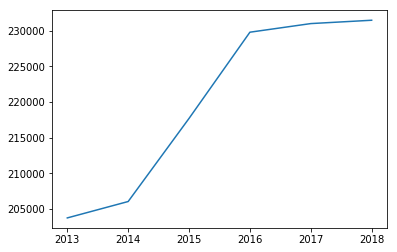

In [88]:
x = [2013,2014,2015,2016,2017,2018]
plt.figure()
plt.plot(x,plotnum)

In [91]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array(x)
X = X.reshape(-1,1)
y = np.array(plotnum)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_) 

[6448.05714286]
-12776108.838095238
